# Handwritten mathematical sumbols

## Data preprocessing

Hand_written
    
    --> handwritten_mathematical_model.ipynb
    --> hasy-data
    --> hasy-data-labels
    --> symbols.csv
    --> hasyv2
        --> hasy-data
        --> hasy-data-labels
        --> symbols.csv
        --> verification-task
    --> verification-task
    
Note:- You can use hasyv2 but for this I have not used that

In [1]:
#Just to check
from IPython.display import Image
Image(url='hasy-data/v2-00010.png')

In [2]:
#importing libraries for preprocessing task
import csv
from PIL import Image as pil_image
import keras.preprocessing.image

Using TensorFlow backend.


In [3]:
#load all images and save there classes

imgs = []
classes = []
with open('hasy-data-labels.csv') as csvFile:
    csvReader = csv.reader(csvFile)
    i = 0
    for row in csvReader:
        if i > 0:
            img = keras.preprocessing.image.img_to_array(pil_image.open(row[0]))
            img /= 255.0
            imgs.append((row[0], row[2], img))
            classes.append(row[2])
        i += 1
print("Total number of images: ", len(imgs)) #print the total number of images 

Total number of images:  168233


Randomly split the data into training and test

80% -> train

20% -> test

In [4]:
import random
random.shuffle(imgs)
split_idx = int(0.8*len(imgs))
train = imgs[:split_idx]
test = imgs[split_idx:]

#Later take 20% from train for validation

In [5]:
import numpy as np

train_input = np.asarray(list(map(lambda row: row[2], train)))
test_input = np.asarray(list(map(lambda row: row[2], test)))

train_output = np.asarray(list(map(lambda row: row[1], train)))
test_output = np.asarray(list(map(lambda row: row[1], test)))

learn about oneHotEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [6]:
#our labels are in the text format therefore using oneHotEncoder to convert them
    
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)

onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoder.fit(integer_encoded)

train_output_int = label_encoder.transform(train_output)
train_output = onehot_encoder.transform(train_output_int.reshape(len(train_output_int), 1))
test_output_int = label_encoder.transform(test_output)
test_ouput = onehot_encoder.transform(test_output_int.reshape(len(test_output_int), 1))

num_classes = len(label_encoder.classes_)

print("Number of classes", num_classes)
print("Shape of the input image: ", np.shape(train_input[0]))

/Applications/Anaconda-Navigator/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Number of classes 369
Shape of the input image:  (32, 32, 3)


## Model

In [8]:
#importing libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D
)

This is very basic CNN architecture with some convolution layer followed by max pooling layer
which is then followed by flatten and some dense layer.


In [9]:
#model architecture

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = np.shape(train_input[0])),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(1024, activation = 'tanh'),
    Dropout(0.5),  #to reduce overfitting
    Dense(num_classes, activation='softmax')
])

In [16]:
#compile model
learning_rate = 1e-5 #1e-2 (0.01)

model.compile(
            optimizer = 'adam', #Adam(lr = learning_rate)
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1180672   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

Training

In [18]:
BATCH_SIZE = 32
EPOCHS = 15 #10
VALIDATION_SPLIT = 0.2

history = model.fit(train_input, train_output,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   verbose = 1,
                   validation_split = VALIDATION_SPLIT)

#Accuracy I achieved was nearly 82% after 10th epoch (Val_accuracy -> 77%) 
#tuning hyparameters and changing model architecture will help you gain much more accuracy and reduce overfitting

Epoch 1/15
3365/3365 [==============================] - 152s 45ms/step - loss: 1.7199 - accuracy: 0.5893 - val_loss: 0.9611 - val_accuracy: 0.7352
Epoch 2/15
3365/3365 [==============================] - 162s 48ms/step - loss: 0.9769 - accuracy: 0.7304 - val_loss: 0.8759 - val_accuracy: 0.7541
Epoch 3/15
3365/3365 [==============================] - 156s 46ms/step - loss: 0.8200 - accuracy: 0.7612 - val_loss: 0.8510 - val_accuracy: 0.7549
Epoch 4/15
3365/3365 [==============================] - 159s 47ms/step - loss: 0.7502 - accuracy: 0.7771 - val_loss: 0.8300 - val_accuracy: 0.7624
Epoch 5/15
3365/3365 [==============================] - 147s 44ms/step - loss: 0.6774 - accuracy: 0.7937 - val_loss: 0.8371 - val_accuracy: 0.7627
Epoch 6/15
3365/3365 [==============================] - 153s 45ms/step - loss: 0.6395 - accuracy: 0.8017 - val_loss: 0.8544 - val_accuracy: 0.7590
Epoch 7/15
3365/3365 [==============================] - 151s 45ms/step - loss: 0.6020 - accuracy: 0.8102 - val_loss: 0

Plotting the graphs: 
    1. Training and validation accuracy
    2. Training and validation loss

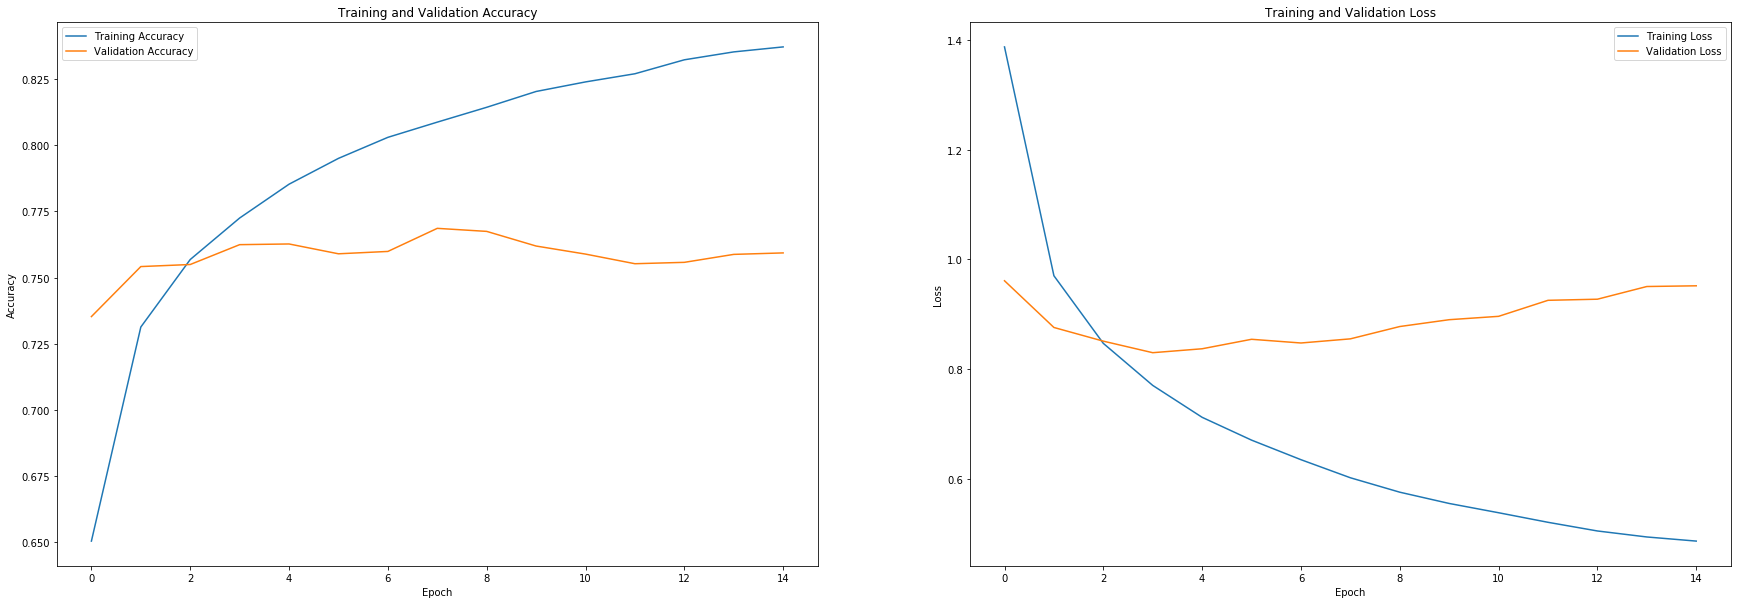

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.subplots(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

## Saving model

In [20]:
model.save('mathSymbolsPredictor.model')
np.save('classes.npy', label_encoder.classes_)

/Applications/Anaconda-Navigator/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2292: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/Applications/Anaconda-Navigator/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1377: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


INFO:tensorflow:Assets written to: mathSymbolsPredictor.model/assets


## New predictions

In [22]:
import keras.models
#model_ = keras.models.load('mathSymbolsPredictor.model')

label_encoder2 = LabelEncoder()
label_encoder2.classes_ = np.load('classes.npy')

PATH = 'hasy-data/v2-00100.png'

image = keras.preprocessing.image.img_to_array(pil_image.open(PATH))
image /= 255.
predicted = (model.predict(image.reshape(1, 32, 32, 3)))
inverted = label_encoder2.inverse_transform([np.argmax(predicted)])
print(inverted[0], np.max(predicted))
(Image(url=PATH))

J 0.773028


# Convert your model into .tflite 
## To deploy it on an application

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"
tf.saved_model.save(model, RPS_SAVED_MODEL)

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [ ]:
import tensorflow as tf
tflite_model_file = 'handwritten_mathematical_symbol_model_v1.tflite'